Amplitude=-0.5732593218217356, Angular freq.=0.01730377647684199, phase=-0.9624165538465488,  Max. Cov.=[[ 2.64359219e-05 -1.02118563e-07  4.51211588e-06]
 [-1.02118563e-07  1.58685921e-08 -3.62559747e-07]
 [ 4.51211588e-06 -3.62559747e-07  6.36324140e-05]]
Errore Amp
0.005141587492591986
Errore freq
0.00012597060007019315
Errore phase
0.00797699279018744


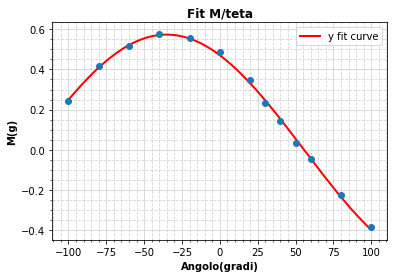

MinAngle
55.615561556155626
Amplitude=0.5623095585751117, Angular freq.=0.01811583878214667, phase=-0.8872113690524204,  Max. Cov.=[[ 3.00765274e-05  6.25768798e-08 -1.04726424e-05]
 [ 6.25768798e-08  1.98754484e-08 -2.76701205e-07]
 [-1.04726424e-05 -2.76701205e-07  9.12985471e-05]]
Errore Amp
0.005484207088787312
Errore freq
0.00014098031210585575
Errore phase
0.009555027322595708


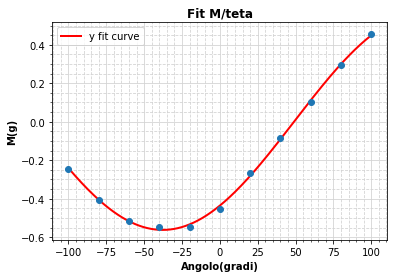

MinAngle
48.97489748974897
[-100  -80  -60  -40  -20    0   20   40   60   80  100]
errore Angle1 dopo ricucitura
0.957048020084027
errore Angle 2 dopo ricucitura
1.0474627387169209
Amplitude=-0.5682533384604632, Angular freq.=0.017698827437579473, phase=0.006823282036113718,  Max. Cov.=[[ 2.66923206e-05 -7.67828141e-09  5.29970444e-06]
 [-7.67828141e-09  5.61575342e-09 -2.31006848e-07]
 [ 5.29970444e-06 -2.31006848e-07  7.53067936e-05]]
Errore Amp
0.005166461132736143
Errore freq
7.493833074708985e-05
Errore phase
0.008677948695055688


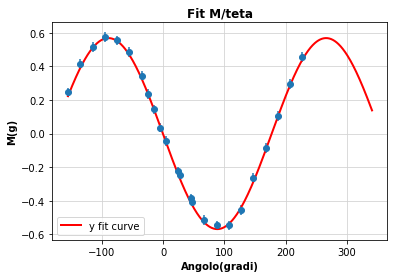

Errore masse dopo ricucitura
0.06477653896280665


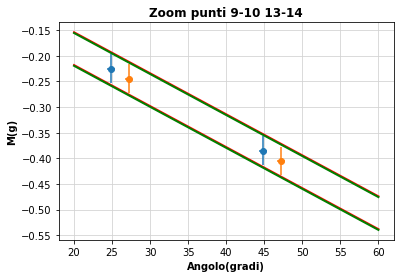

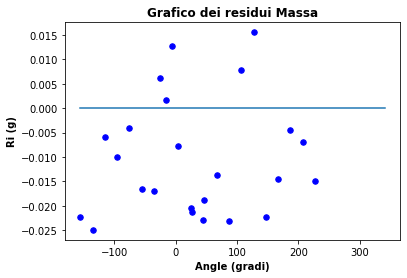

sigma_post_fit
0.016344784361011912


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize


F = ([2.45E-01,4.15E-01,5.15E-01,5.75E-01,5.55E-01,4.85E-01,3.45E-01,1.45E-01,-4.50E-02,-2.25E-01,-3.85E-01,3.50E-02,2.35E-01])
Angle = np.array([-100,-80,-60,-40,-20,0,20,40,60,80,100,50,30])

Angle_err = np.ones(len(Angle))*0.5
F_err = np.ones(len(F))*0.01


fig = plt.figure()
ax = fig.gca()

plt.title("Fit M/teta",fontweight="bold")
plt.xlabel("Angolo(gradi)",fontweight="bold")
plt.ylabel("M(g)",fontweight="bold")

plt.grid(color='lightgray',linestyle="-",zorder=0)
plt.minorticks_on()
plt.grid(b=True, which='minor', color='lightgray', linestyle='--')
plt.errorbar(Angle, F, xerr=Angle_err, yerr=F_err, fmt='o')




def fit_sin(tt, yy, guess):
    '''Fit sin to the input time sequence, and return fitting parameters "amp", "omega", "phase", "offset", "freq", "period" and "fitfunc"'''
    tt = np.array(tt)
    yy = np.array(yy)
    ff = np.fft.fftfreq(len(tt), (tt[1]-tt[0]))   # assume uniform spacing
    Fyy = abs(np.fft.fft(yy))
    guess_freq = abs(ff[np.argmax(Fyy[1:])+1])   # excluding the zero frequency "peak", which is related to offset
    guess_amp = np.std(yy) * 2.**0.5
    guess_offset = np.mean(yy)
    #guess = np.array([guess_amp, 2.*np.pi*guess_freq, 0.])

    def sinfunc(t, A, w, p):  return A * np.sin(w*t + p) 
    popt, pcov = scipy.optimize.curve_fit(sinfunc, tt, yy, p0=guess,sigma=F_err)
    A, w, p = popt
    f = w/(2.*np.pi)
    fitfunc = lambda t: A * np.sin(w*t + p)
    return {"amp": A, "omega": w, "phase": p, "freq": f, "period": 1./f, "fitfunc": fitfunc, "cov": pcov, "rawres": (guess,popt,pcov)}


res = fit_sin(Angle, F,np.array([-0.5406812490869503,0.01818277162266147,-0.9330953952064085]))
print( "Amplitude=%(amp)s, Angular freq.=%(omega)s, phase=%(phase)s,  Max. Cov.=%(cov)s" % res )
err = np.sqrt(np.diag(res["cov"]))
print("Errore Amp")
print(err[0])
print("Errore freq")
print(err[1])
print("Errore phase")
phi_set1_err = err[2]
print(err[2])


x = np.linspace(min(Angle),max(Angle),10000)

plt.plot(x, res["fitfunc"](x), "r-", label="y fit curve", linewidth=2)
plt.legend(loc="best")
plt.show()
phi_set1 = res["phase"]*360/2/np.pi

MinAngle = 360
MinValue = 100
for i in range(10000):
  if(np.abs(res["fitfunc"](x[i])) < MinValue):
    MinValue = np.abs(res["fitfunc"](x[i]))
    MinAngle = x[i]

MinAngle =  MinAngle
print("MinAngle")
print(MinAngle)




F2 = ([-2.45E-01,-4.05E-01,-5.15E-01,-5.45E-01,-5.45E-01,-4.55E-01,-2.65E-01,-8.50E-02,1.05E-01,2.95E-01,4.55E-01])
Angle2 = np.array([-100,-80,-60,-40,-20,0,20,40,60,80,100])

Angle_err = np.ones(len(Angle2))*0.5
F_err = np.ones(len(F2))*0.01


fig = plt.figure()
ax = fig.gca()

plt.title("Fit M/teta",fontweight="bold")
plt.xlabel("Angolo(gradi)",fontweight="bold")
plt.ylabel("M(g)",fontweight="bold")

plt.grid(color='lightgray',linestyle="-",zorder=0)
plt.minorticks_on()
plt.grid(b=True, which='minor', color='lightgray', linestyle='--')
plt.errorbar(Angle2, F2, xerr=Angle_err, yerr=F_err, fmt='o')

res = fit_sin(Angle2, F2,np.array([0.540153013770123,0.018568647719273988,-0.8686816133362655]))
print( "Amplitude=%(amp)s, Angular freq.=%(omega)s, phase=%(phase)s,  Max. Cov.=%(cov)s" % res )
err = np.sqrt(np.diag(res["cov"]))
print("Errore Amp")
print(err[0])
print("Errore freq")
print(err[1])
print("Errore phase")
phi_set2_err = err[2]
print(err[2])


x = np.linspace(min(Angle2),max(Angle2),10000)

plt.plot(x, res["fitfunc"](x), "r-", label="y fit curve", linewidth=2)
plt.legend(loc="best")
plt.show()
phi_set2 = res["phase"]*360/2/np.pi

MinAngle2 = 360
MinValue = 100
for i in range(10000):
  if(np.abs(res["fitfunc"](x[i])) < MinValue):
    MinValue = np.abs(res["fitfunc"](x[i]))
    MinAngle2 = x[i]

MinAngle2 = MinAngle2
print("MinAngle")
print(MinAngle2)


Ftot = np.concatenate([F,F2])
#per il fit aggiungere F qui sotto decommentando
#F2 = np.array([0,0.001405855646,0.00276899508,0.004048,0.005204008488,0.006201895811,0.007011341669,0.007607751458,0.007973003568,0.008096,0.007973003568,0.007607751458,0.007011341669,0.006201895811,0.005204008488,0.004048,0.00276899508,0.001405855646,0])
Angle_err = np.ones(len(Angle)+len(Angle2))*0.5
F_err = np.ones(len(F)+len(F2))*0.028
#per il fit commentare questa riga

#RICUCITURA

#Angle = Angle - 360*phi_set1/2/np.pi
#Angle2 = Angle2 - 360*phi_set2/2/np.pi

#Angle = Angle + MinAngle
#Angle = Angle -53.4637
#Angle = Angle +53.4637+70.63
print(Angle2)
#Angle2 = Angle2 + 180+MinAngle*2-MinAngle2-8.5
#Angle2 = Angle2 + 180+2.13067
#Angle2 = Angle2 + 180+55.6021+70.63
Angle = Angle +phi_set1
Angle2 = Angle2 + 180+phi_set2-2

err_Angle1 = Angle_err[0]+360*(phi_set1_err)/(2*np.pi)
print("errore Angle1 dopo ricucitura")
print(err_Angle1)
err_Angle2 = Angle_err[0]+360*(phi_set2_err)/(2*np.pi)
print("errore Angle 2 dopo ricucitura")
print(err_Angle2)

Angletot = np.concatenate([Angle,Angle2])

res = fit_sin(Angletot, Ftot,np.array([0.540153013770123,0.018568647719273988,-0.8686816133362655]))
print( "Amplitude=%(amp)s, Angular freq.=%(omega)s, phase=%(phase)s,  Max. Cov.=%(cov)s" % res )
err = np.sqrt(np.diag(res["cov"]))
print("Errore Amp")
print(err[0])
print("Errore freq")
print(err[1])
print("Errore phase")
print(err[2])


fig = plt.figure()
ax = fig.gca()

plt.title("Fit M/teta",fontweight="bold")
plt.xlabel("Angolo(gradi)",fontweight="bold")
plt.ylabel("M(g)",fontweight="bold")

plt.grid(color='lightgray',linestyle="-",zorder=0)
plt.errorbar(Angletot, Ftot, xerr=Angle_err, yerr=F_err, fmt='o')


x = np.linspace(min(Angletot),max(Angletot)*1.5,1000)
A = res["amp"]
phi = res["phase"]

w = res["omega"]


Ff = res["fitfunc"](Angletot)
plt.plot(x, res["fitfunc"](x), "r-", label="y fit curve", linewidth=2)

plt.legend(loc="best")
plt.show()



fig = plt.figure()
ax = fig.gca()

plt.title("Zoom punti 9-10 13-14",fontweight="bold")
plt.xlabel("Angolo(gradi)",fontweight="bold")
plt.ylabel("M(g)",fontweight="bold")

plt.grid(color='lightgray',linestyle="-",zorder=0)
plt.errorbar([Angletot[9],Angletot[10]], [Ftot[9],Ftot[10]], xerr=[0.5,0.5], yerr=[F_err[11],F_err[13]], fmt='o')

x = np.linspace(20,60,100)
y2 = Ftot[9]
y1 = Ftot[10]
x2 = Angletot[9]
x1 = Angletot[10]
m = (y2-y1)/(x2-x1)
q1 = y1+0.028-m*(x1+0.5)
plt.plot(x, m*x+q1, "r-", label="Max", linewidth=2)
q2 = y1-0.028-m*(x1-0.5)
plt.plot(x, m*x+q2, "r-", label="Min", linewidth=2)

plt.errorbar([Angletot[13],Angletot[14]], [Ftot[13],Ftot[14]], xerr=[0.5,0.5], yerr=[F_err[11],F_err[13]], fmt='o')

x = np.linspace(20,60,100)
y2 = Ftot[13]
y1 = Ftot[14]
x2 = Angletot[13]
x1 = Angletot[14]
m = (y2-y1)/(x2-x1)
q1 = y1+0.028-m*(x1+0.5)
plt.plot(x, m*x+q1, "r-", label="Max", linewidth=2, color="green")
q2 = y1-0.028-m*(x1-0.5)
plt.plot(x, m*x+q2, "r-", label="Min", linewidth=2, color="green")




print("Errore masse dopo ricucitura")
print((0.01**2+(q1-q2)**2)**(1/2))
plt.show()

Ri = Ff-Ftot

fig = plt.figure()
ax = fig.gca()
plt.title("Grafico dei residui Massa",fontweight="bold")
plt.xlabel("Angle (gradi)",fontweight="bold")
plt.ylabel("Ri (g)",fontweight="bold")
plt.plot(np.linspace(min(Angletot),max(Angletot)*1.5,1000),np.zeros(1000))
plt.scatter(Angletot,Ri, s=30, color='blue',zorder=3)

plt.show()


sigma_post_fit = (np.sum((Ff-Ftot)**2)/(len(Ff)-2))**(1/2)
print("sigma_post_fit")
print(sigma_post_fit)